# 🥑 Анализ  и прогнозирование цен на авокадо

## 1. Описание данных
- **Набор**: Avocado Prices and Sales Volume 2015-2023  
- **Источник**: https://www.kaggle.com/datasets/vakhariapujan/avocado-prices-and-sales-volume-2015-2023 
- **Размер**: 53415 наблюдений, 12 признаков, ~5 МБ памяти

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [5]:
dataframe = pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
print(dataframe.head())
print(dataframe.info())

         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  
<class '

**Описание признаков:**
- **Дата**: Последний день недели (категориальный признак)
- **Средняя цена**: Средняя цена продажи (количественный признак)
- **Общий объем**: Общий объем проданных авокадо по весу в фунтах (количественный признак)
- **plu4046**: Вес - Авокадо Hass мелкого / среднего размера (~3-5 унций)  (количественный признак)
- **plu4225**: Вес - Крупные авокадо Hass (~ 8-10 унций) (количественный признак)
- **plu4770**: Вес - Очень крупные авокадо Hass  (~ 10-15 унций) (количественный признак)
- **Всего упаковок**: Общий вес проданных упаковок (На упаковках указан предварительно собранный контейнер, состоящий из различного количества авокадо смешанного типа PLU) (количественный признак)
- **Маленькие упаковки**: Суммарный вес (количественный признак)
- **Большие упаковки**: Суммарный вес (количественный признак)
- **Очень большие упаковки**: Суммарный вес (количественный признак)
- **Тип**: Обычное или органическое (категориальный признак)
- **Регион**: Регион производства (категориальный признак)

## 2. Разведочный анализ данных (EDA)

При предварительном анализе изменений цен на авокадо признаки тип и регион учитывать не будем. 
### a. Summary statistics 

In [6]:
dataframe.describe().T #Количество, среднее значение, стандартное отклонение, минимум, квартили, максимум выборки

numeric_data = dataframe.select_dtypes(include=[np.number])  # Только числовые колонки
display(numeric_data.describe().T)

variance_values = numeric_data.var()
print('       ---Variance---') #Дисперсия
print(variance_values)

,count,mean,std,min,25%,50%,75%,max
AveragePrice,53415.0,1.428910,3.931160e-01,0.44,1.119091,1.40,1.690,3.440830e+00
TotalVolume,53415.0,869447.441374,3.545274e+06,84.56,16264.655000,120352.46,454238.015,6.103446e+07
plu4046,53415.0,298270.749448,1.307669e+06,0.00,694.725000,14580.58,128792.380,2.544720e+07
plu4225,53415.0,222217.037654,9.554624e+05,0.00,2120.800000,17516.63,93515.600,2.047057e+07
plu4770,53415.0,20531.954686,1.040977e+05,0.00,0.000000,90.05,3599.735,2.860025e+06
TotalBags,53415.0,217508.289491,8.676947e+05,0.00,7846.520000,36953.10,111014.610,1.629830e+07
SmallBags,41025.0,103922.170677,5.692608e+05,0.00,0.000000,694.58,37952.980,1.256716e+07
LargeBags,41025.0,23313.164066,1.496622e+05,0.00,0.000000,0.00,2814.920,4.324231e+06
XLargeBags,41025.0,2731.811796,2.258910e+04,0.00,0.000000,0.00,0.000,6.795868e+05


       ---Variance---
AveragePrice    1.545402e-01
TotalVolume     1.256897e+13
plu4046         1.709999e+12
plu4225         9.129084e+11
plu4770         1.083633e+10
TotalBags       7.528942e+11
SmallBags       3.240579e+11
LargeBags       2.239879e+10
XLargeBags      5.102673e+08
dtype: float64


#### Выводы из описательной статистики:

- #####  Распределение цен:
Низкое стандартное отклонение AveragePrice (0.393) указывает на ограниченный диапазон колебаний цен. 
Близость медианы и 50-го перцентиля подтверждает симметричность распределения.

- ##### Объем продаж:
Значительное стандартное отклонение TotalVolume (3.5M) свидетельствует о сильных колебаниях спроса. 
Существенное превышение максимальных значений над 75-м перцентилем указывает на выбросы. 
plu4046 составляет основную долю в общем объеме продаж.


**Разное количество наблюдений свидетельствует о пропусках в информации о продажах авокадо в упаковкаx.**



### b. График pairplot

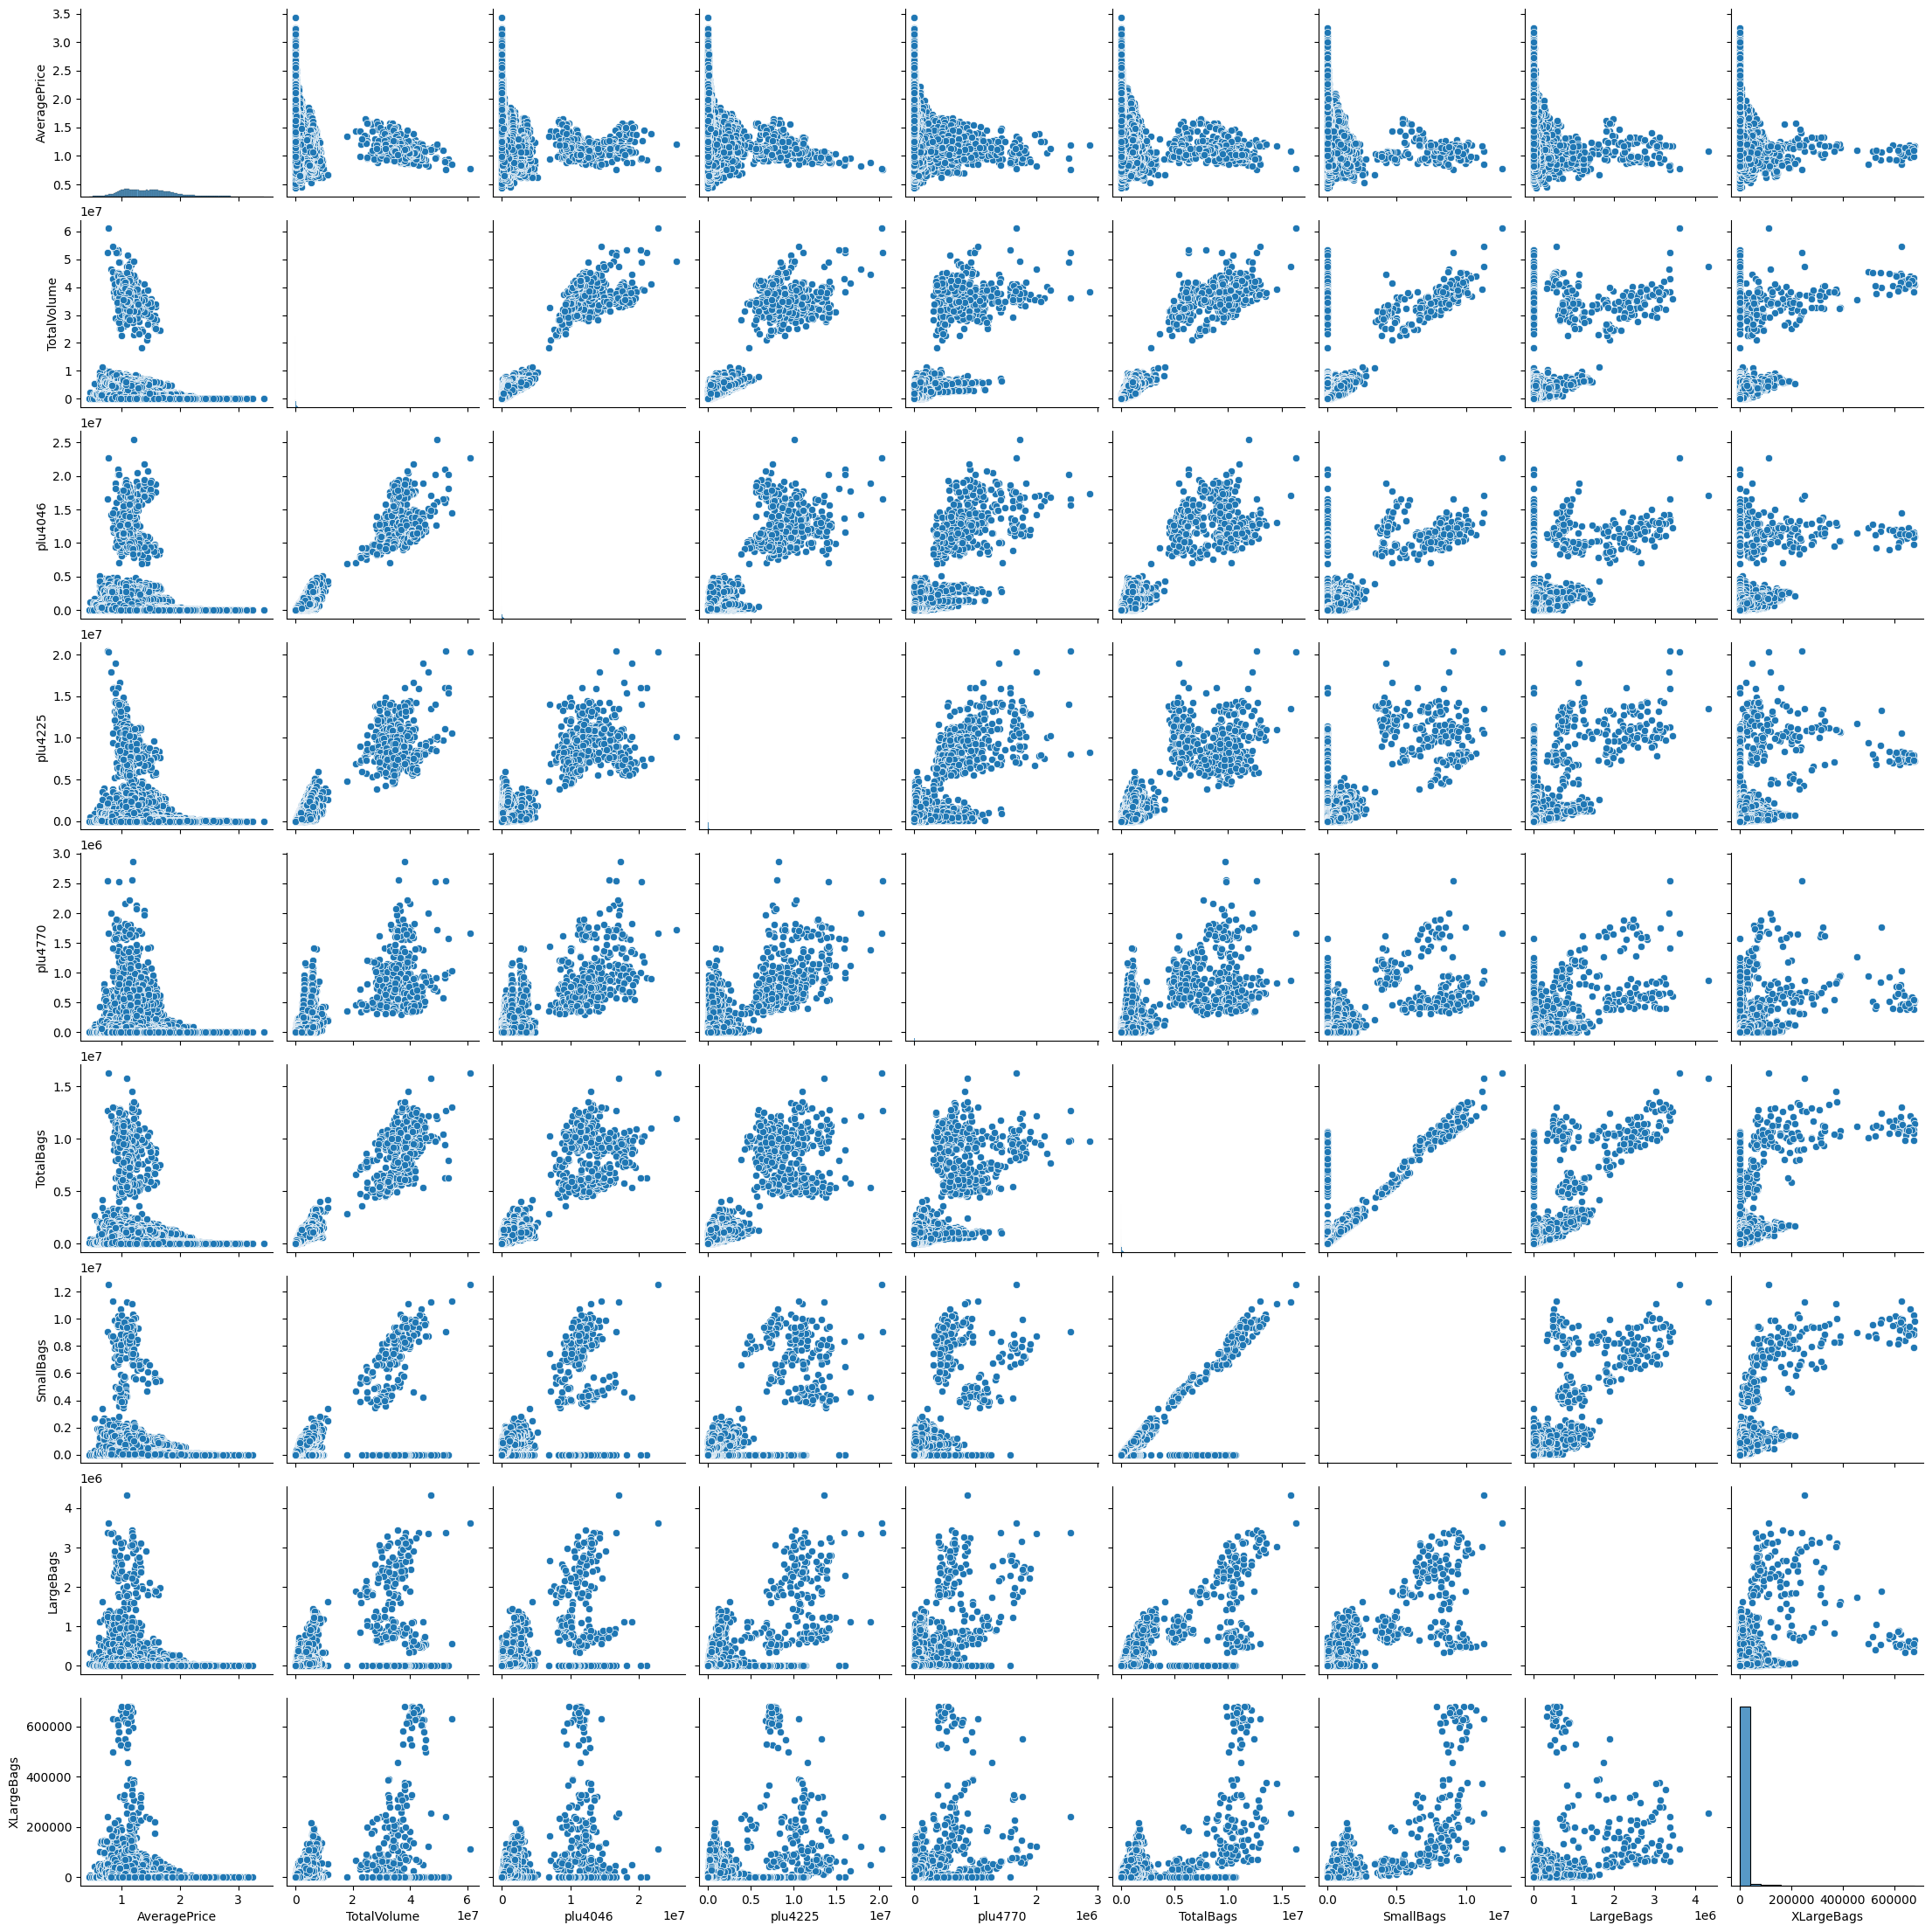

In [7]:
sns.pairplot(numeric_data) 
plt.show() 


**Линейная зависимость:** 
Наблюдается прямая пропорциональная связь между TotalBags и SmallBags, что ожидаемо, поскольку SmallBags являются компонентом TotalBags
Можно сделать вывод что SmallBags составляют основную долю TotalBags.


**Распределение выбросов:** Все метрики объемов демонстрируют наличие аномальных значений, наиболее выраженных в категории XLargeBags.

### с. График boxplot

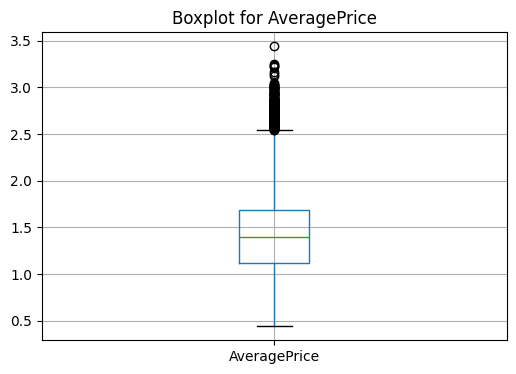

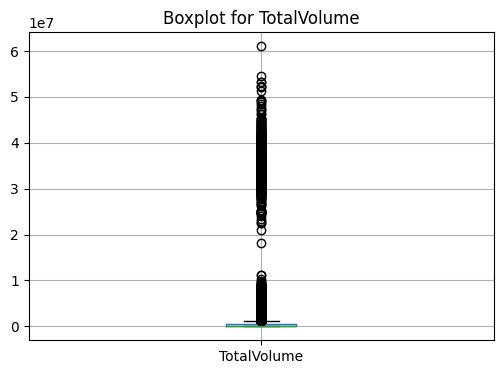

In [8]:
data = numeric_data#dataframe

plt.figure(figsize=(6,4))  
data.boxplot('AveragePrice')  
plt.title(f'Boxplot for AveragePrice')
plt.show() 


plt.figure(figsize=(6,4))  
data.boxplot('TotalVolume')  
plt.title(f'Boxplot for TotalVolume')
plt.show() 


- **Цены**: Симметричное распределение с ограниченным количеством выбросов соответствует нормальному распределению.
- **Объем продаж**: Асимметричное распределение с многочисленными выбросами указывает на распределение отличное от нормального.
(Графики для остальных параметров, связаных с объемами продаж имеют схожий вид с приведенным графиком.)

### d. Корреляционная матрица

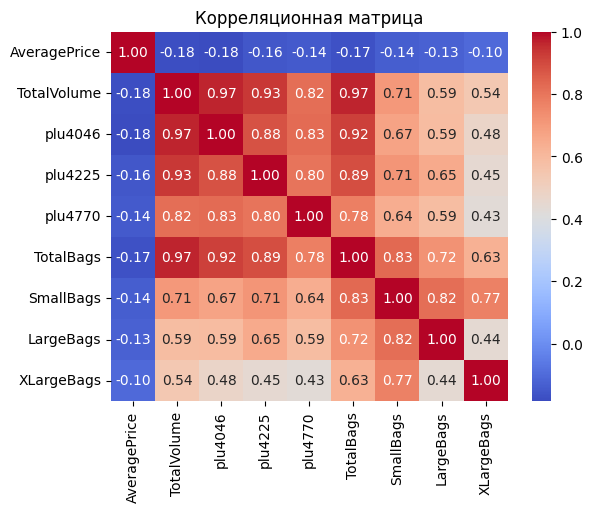

In [34]:
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

Наблюдается сильная корреляция общего объема продаж как с TotalBags (0.97), так и с plu4046 (0.97). Это означает, что продажи упаковок и продажи мелких авокадо практически полностью определяют общий объем рынка.

Мелкие упаковки (SmallBags) демонстрируют наибольшую связь с TotalBags (0.83), тогда как крупные (LargeBags) и очень крупные (XLargeBags) упаковки показывают более слабые связи - 0.72 и 0.63 соответственно.

Все объемные показатели демонстрируют слабую отрицательную корреляцию со средней ценой (от -0.10 до -0.18), то есть объемы продаж оказывают умеренное обратное влияние на цену. Наибольшее влияние на цену оказывают общий объем продаж и продажи мелких авокадо plu4046.

Таким образом, **рынок авокадо характеризуется доминированием мелких форматов** - как в виде отдельных фруктов (plu4046), так и в упаковках (SmallBags), которые совместно определяют как объемы продаж, так и ценовую динамику.


### e. Динамика количественных показателей по датам

C:\Users\na20s\AppData\Local\Temp\ipykernel_25596\16010494.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], infer_datetime_format=True)


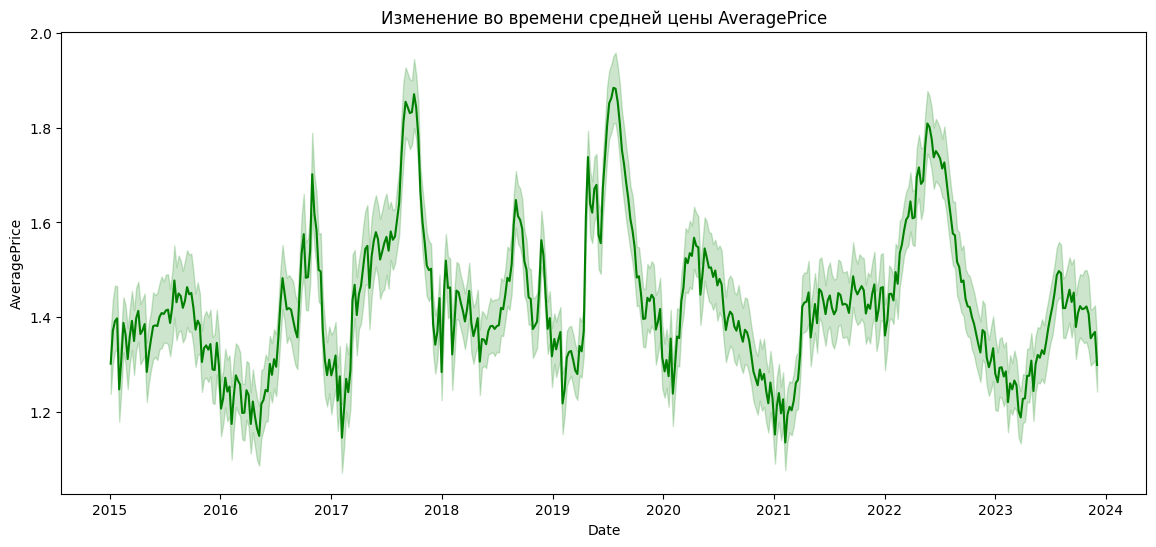

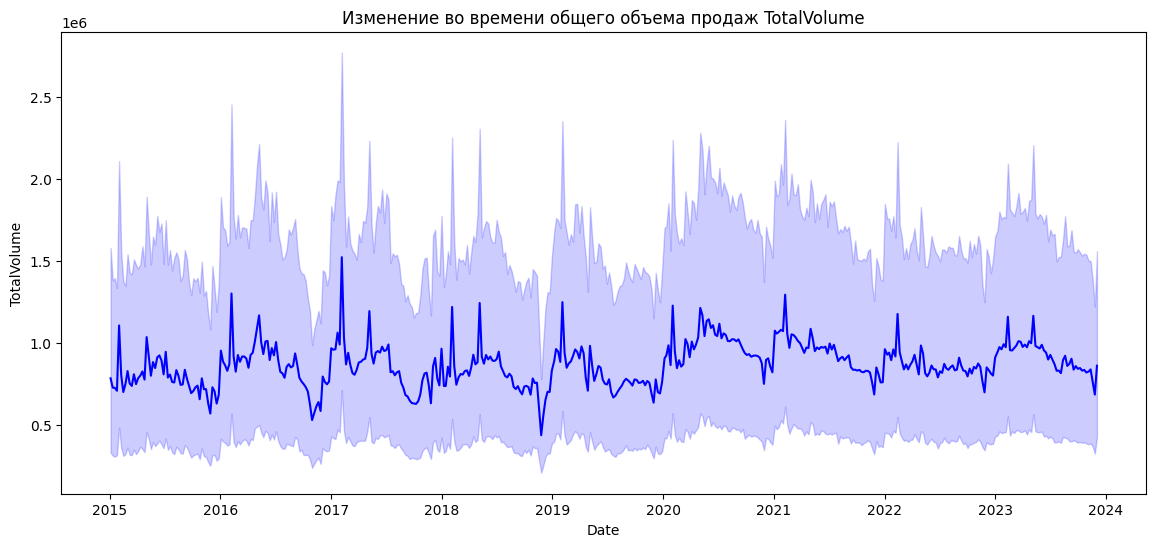

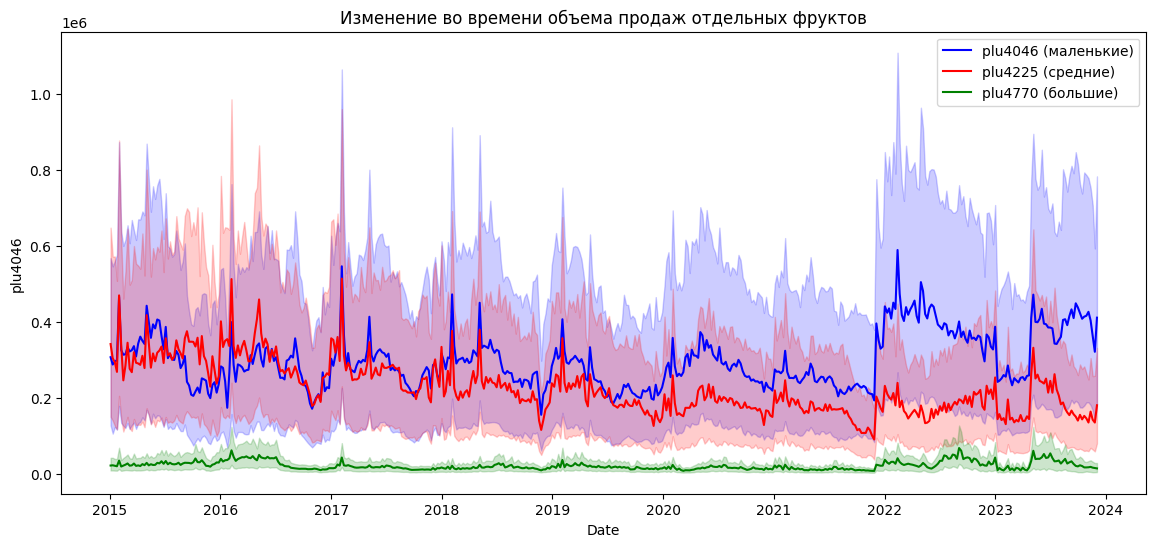

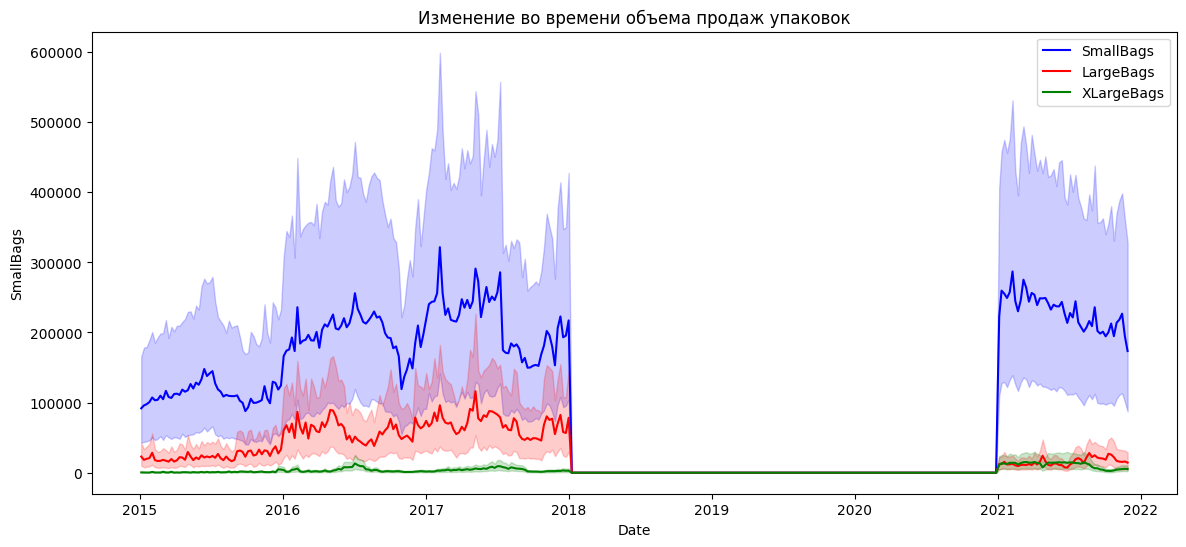

In [10]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'], infer_datetime_format=True)

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='AveragePrice', data=dataframe, color = 'green')
plt.title('Изменение во времени средней цены AveragePrice')
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='TotalVolume', data=dataframe, color = 'blue')
plt.title('Изменение во времени общего объема продаж TotalVolume')
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='plu4046', data=dataframe, color = 'b', label = 'plu4046 (маленькие)')
sns.lineplot(x='Date', y='plu4225', data=dataframe, color = 'r', label = 'plu4225 (средние)')
sns.lineplot(x='Date', y='plu4770', data=dataframe, color = 'g', label = 'plu4770 (большие)')
plt.legend()
plt.title('Изменение во времени объема продаж отдельных фруктов')
plt.show()


plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='SmallBags', data=dataframe, color = 'b', label = 'SmallBags')
sns.lineplot(x='Date', y='LargeBags', data=dataframe, color = 'r', label = 'LargeBags')
sns.lineplot(x='Date', y='XLargeBags', data=dataframe, color = 'g', label = 'XLargeBags')
plt.legend()
plt.title('Изменение во времени объема продаж упаковок')
plt.show()

##### Сезонность
По графикам видно, что данные демонстрируют выраженную сезонную динамику: 
- **Сезонность цен**: Ежегодные минимумы в январе-феврале с последующим ростом к середине года.
- **Обратная корреляция**: Периоды высоких объемов продаж совпадают с низкими ценами.

Данная сезонная картина характерна для сельскохозяйственных товаров и отражает циклы предложения и спроса.
Также можно отметить, что в структуре продаж мелкие авокадо (plu4046) преобладают.

##### Пропуски
Как видно по последнему графику, данные о продажах авокадо в упаковках имеют пропуски с 2018 по 2021 год. Поскольку на графике общего объема продаж это никак не сказалось, можно сделать вывод, что данные о продажах за этот период именно отсутствуют, а не были  нулевыми. Также поскольку пропуски охватывают достаточно длительный период, корректно восстановить или заменить их невозможно, поэтому следует исключить из общих данных для дальнейшей работы.


### f. Очистка от пропусков и выбросов

In [11]:
data_without_gaps = dataframe
# Удаление пропусков
data_without_gaps = data_without_gaps[data_without_gaps['SmallBags'].notna()]
data_without_gaps = data_without_gaps[data_without_gaps['LargeBags'].notna()]
data_without_gaps = data_without_gaps[data_without_gaps['XLargeBags'].notna()]
print(data_without_gaps.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41025 entries, 0 to 41024
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          41025 non-null  datetime64[ns]
 1   AveragePrice  41025 non-null  float64       
 2   TotalVolume   41025 non-null  float64       
 3   plu4046       41025 non-null  float64       
 4   plu4225       41025 non-null  float64       
 5   plu4770       41025 non-null  float64       
 6   TotalBags     41025 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          41025 non-null  object        
 11  region        41025 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 4.1+ MB
None


После удаления пропусков  набор содержит: 12 признаков, 41025 наблюдений, ~4.1 МБ памяти.

In [ ]:
# убираем столбцы со строковыми значениями
columns_to_drop = ['Type', 'Region'] 
data_without_gaps.drop(columns_to_drop, axis=1, inplace=True)
#data_without_gaps.drop(data_without_gaps.columns[[10,11]], axis=1, inplace=True)

# преобразуем дату в отдельные числовые признаки 
data_without_gaps['Date'] = pd.to_datetime(data_without_gaps['Date'])
data_without_gaps['year'] = data_without_gaps['Date'].dt.year
data_without_gaps['month'] = data_without_gaps['Date'].dt.month

# Удаление выбросов с использованием Z-score
z_scores = stats.zscore(data_without_gaps)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_clean = data_without_gaps[filtered_entries]
print(data_clean.info())


data_clean.head()

IndexError: index 10 is out of bounds for axis 0 with size 9

Для обнаружения и удаления выбросов из набора данных был применен метод Z-score. Z-score - это статистическая мера, которая показывает, насколько данное значение отклоняется от среднего значения данных в стандартном отклонении. Выбросы определяются как те значения, Z-score которых превышает определенный порог (в данном случае 3). 

После удаления выбросов и признаков содержащих нечисловое значение набор содержит: 9 признаков, 39807 наблюдений, ~3 МБ памяти.


## 3. Прогнозирование цены

На основе проведенного анализа распределений и корреляций для прогнозирования цен на авокадо были выбраны **Линейная регрессия** и **Random Forest**. 

Выбор линейной регрессии обусловлен нормальным распределением целевой переменной AveragePrice, что делает этот метод статистически обоснованным, а также его прозрачностью и интерпретируемостью результатов.

Случайный лес добавлен как метод, способный улавливать взаимосвязи между признаками, которые могли быть не видны при линейном подходе, а также благодаря его устойчивости к выбросам в данных об объемах продаж. Сравнение производительности этих двух подходов позволяет комплексно оценить возможности прогнозирования и выбрать наиболее эффективную модель.


### Линейная регрессия 

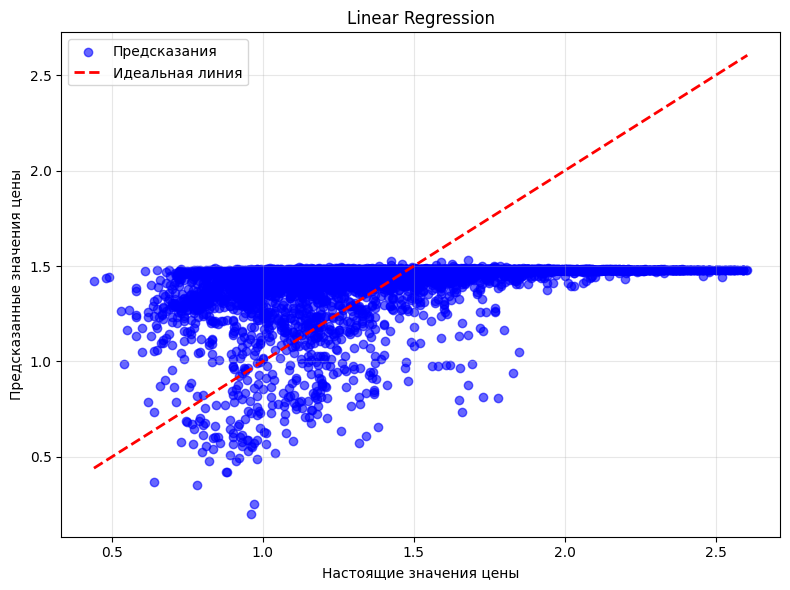

Mean Squared Error: 0.12920921800211127
Время выполнения: 0.03680872917175293 секунд


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

x = data_clean.drop('AveragePrice', axis=1)
y = data_clean['AveragePrice']


start_time = time.time()

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание цены на тестовом наборе данных
y_pred = model.predict(X_test)
end_time = time.time()

# Строим график предсказаний и настоящих значений целевой переменной
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')
plt.xlabel('Настоящие значения цены')
plt.ylabel('Предсказанные значения цены')
plt.title('Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Вычисляем время выполнения в секундах
execution_time = end_time - start_time
print(f'Время выполнения: {execution_time} секунд')


### Случайный лес (Random Forest)

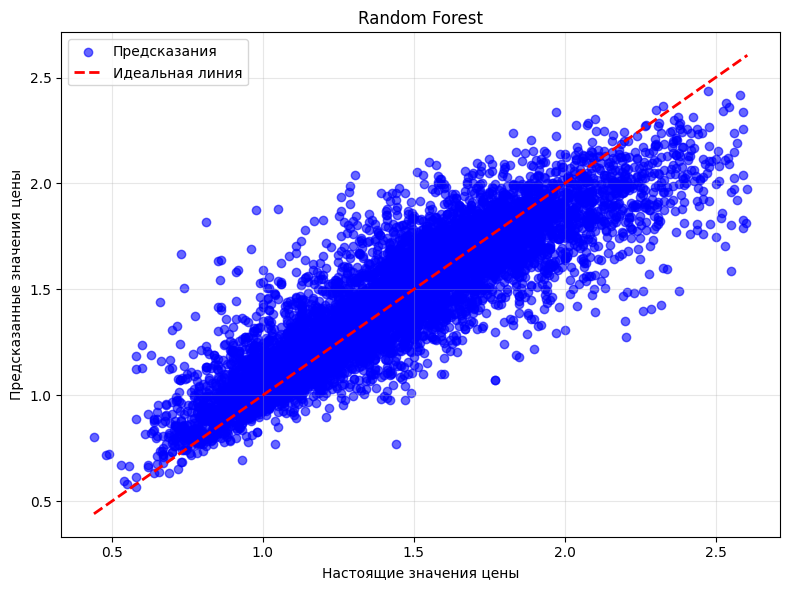

Mean Squared Error: 0.031566783861229034
Время выполнения: 17.40504550933838 секунд


In [14]:
from sklearn.ensemble import RandomForestRegressor

x = data_clean.drop('AveragePrice', axis=1)
y = data_clean['AveragePrice']

start_time = time.time()
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание цены на тестовом наборе данных
y_pred = model.predict(X_test)
end_time = time.time()

# Строим график предсказаний и настоящих значений целевой переменной
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')
plt.xlabel('Настоящие значения цены')
plt.ylabel('Предсказанные значения цены')
plt.title('Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Вычисляем время выполнения в секундах
execution_time = end_time - start_time
print(f'Время выполнения: {execution_time} секунд')

### Linear Regression:
- **MSE = 0.129**
- **Время = 0.04 секунды**

### Random Forest:
- **MSE = 0.032**
- **Время = 17.41 секунды**

Результаты прогнозирования показывают, что случайный лес значительно превосходит линейную регрессию по точности предсказания цен на авокадо. Это объясняется способностью случайного леса улавливать сложные нелинейные зависимости между объемом продаж и ценой, в то время как линейная регрессия может аппроксимировать только простые линейные связи. Визуальный анализ графиков предсказаний подтверждает, что случайный лес обеспечивает равномерное распределение прогнозов вдоль идеальной линии, тогда как линейная регрессия дает значительный разброс ошибок.

Таким образом, для задач прогнозирования цен на авокадо рекомендуется использовать **случайный лес**, несмотря на затрачиваемое время, поскольку он обеспечивает в 4 раза более высокую точность по сравнению с линейной регрессией.